# Árvore de Decisão em R

O processo:
1. Definir problema de negócio
2. Coletar dados
3. Análise Exploratória
4. Manipulação de Dados - Munging
5. Treinar modelos
6. Avaliar modelo
7. Otimizar modelo


## Existem diversos pacotes para Árvores de Decisão em R. 

## Usaremos o rpart()

In [7]:
#install.packages('rpart')
library(rpart)

In [3]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [8]:
head(kyphosis, n = 1)

Kyphosis,Age,Number,Start
absent,71,3,5


In [ ]:
View(kyphosis)

## Após explorar o Dataset, criar Modelo de Árvore de Decisão

In [10]:
?rpart

In [12]:
arvore <- rpart(Kyphosis ~ .,       # relacionando a deformação com todas as variáveis
                method = 'class',   # método classificação para um PROBLEMA de classificação
                data = kyphosis)    # dataset

In [13]:
class(arvore)

[1] "rpart"

In [14]:
arvore # esta impressão não é visual

n= 81 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 81 17 absent (0.79012346 0.20987654)  
   2) Start>=8.5 62  6 absent (0.90322581 0.09677419)  
     4) Start>=14.5 29  0 absent (1.00000000 0.00000000) *
     5) Start< 14.5 33  6 absent (0.81818182 0.18181818)  
      10) Age< 55 12  0 absent (1.00000000 0.00000000) *
      11) Age>=55 21  6 absent (0.71428571 0.28571429)  
        22) Age>=111 14  2 absent (0.85714286 0.14285714) *
        23) Age< 111 7  3 present (0.42857143 0.57142857) *
   3) Start< 8.5 19  8 present (0.42105263 0.57894737) *

In [15]:
printcp(arvore)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error  xerror    xstd
1 0.176471      0   1.00000 1.00000 0.21559
2 0.019608      1   0.82353 0.94118 0.21078
3 0.010000      4   0.76471 0.94118 0.21078


In [ ]:
#variáveis usadas: Age | Start
#erro do modelo árvore = 0.2098
#qtde observações = 81

### Visualizar Árvore e aplicar camada gráfica

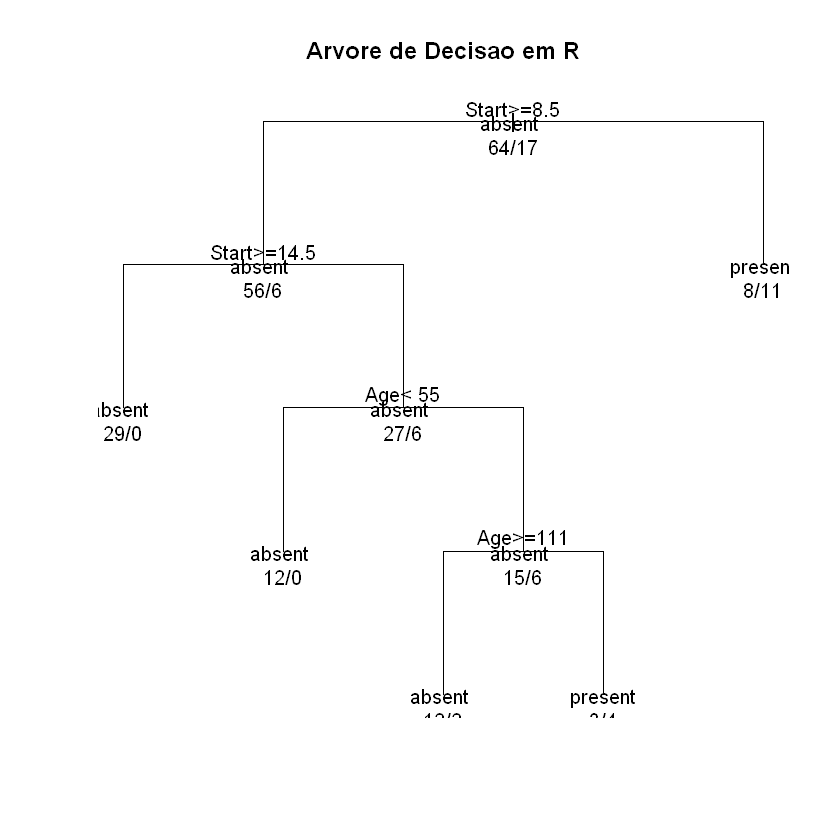

In [17]:
plot(arvore, uniform = TRUE, main = "Arvore de Decisao em R")
text(arvore, use.n = TRUE, all = TRUE)

## Este pacote é complementar ao {rpart} - Visualização legível

In [27]:
#install.packages('rpart.plot')
library(rpart.plot)

## Dataset Iris - 3 espécies de flores, 4 medidas

In [30]:
library(datasets)

head(iris, n = 1)

In [ ]:
View(iris)

## Análise Exploratória de dados com ggplot2

In [31]:
install.packages("ggplot2")
library(ggplot2)

also installing the dependencies 'desc', 'pkgbuild', 'pkgload', 'praise', 'rlang', 'testthat', 'isoband'



package 'desc' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anell\AppData\Local\Temp\Rtmpi28bEi\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## Nitidamente o cojunto possui grupos com características similares

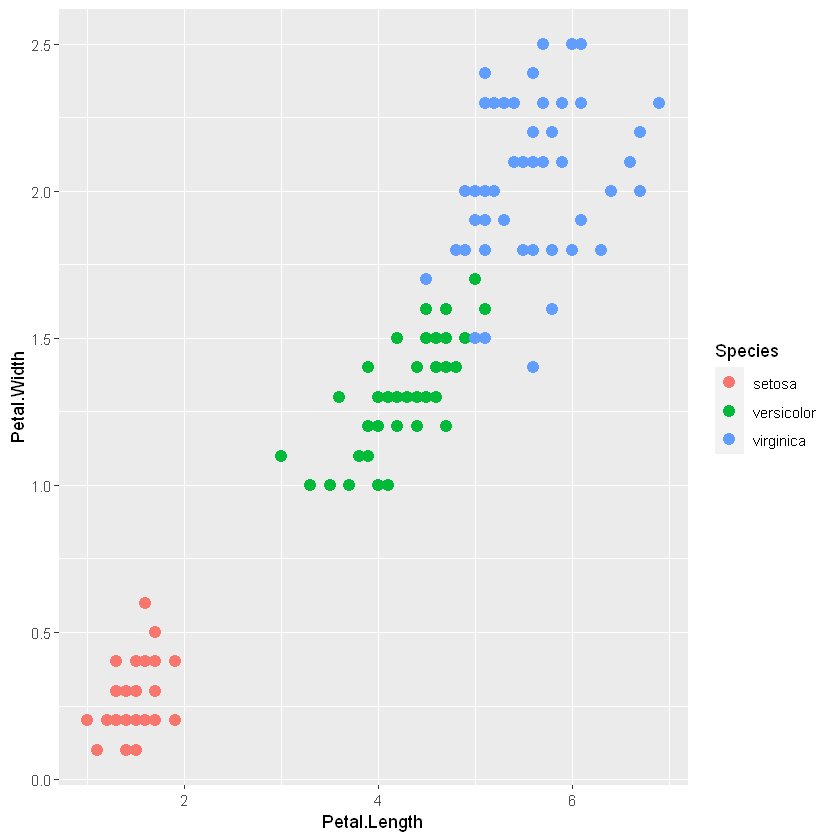

In [33]:
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point(size = 3)

## Agora usar o K-Means para agrupar dados em Clusters

In [ ]:
help(kmeans) # algoritmo mais famoso de clusterizaçãos

## Criar modelo de clusterings com K-Kmeans (não-supervisionada)


In [34]:
irisCluster <- kmeans(iris[, 1:4], #conjunto de dados e slicing das 4 colunas
                      3,           #indicar número de clusters desejado
                      nstart = 20) #quantidade de números randômicos

In [35]:
irisCluster

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

## Aplicar tabulação à saída de K-Means

In [36]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         48        14
  2     50          0         0
  3      0          2        36

## Visualizar clusters graficamente

In [37]:
install.packages("cluster")
library(cluster)
#help(clusplot)

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anell\AppData\Local\Temp\Rtmpi28bEi\downloaded_packages


Warning message:
"package 'cluster' was built under R version 3.6.3"

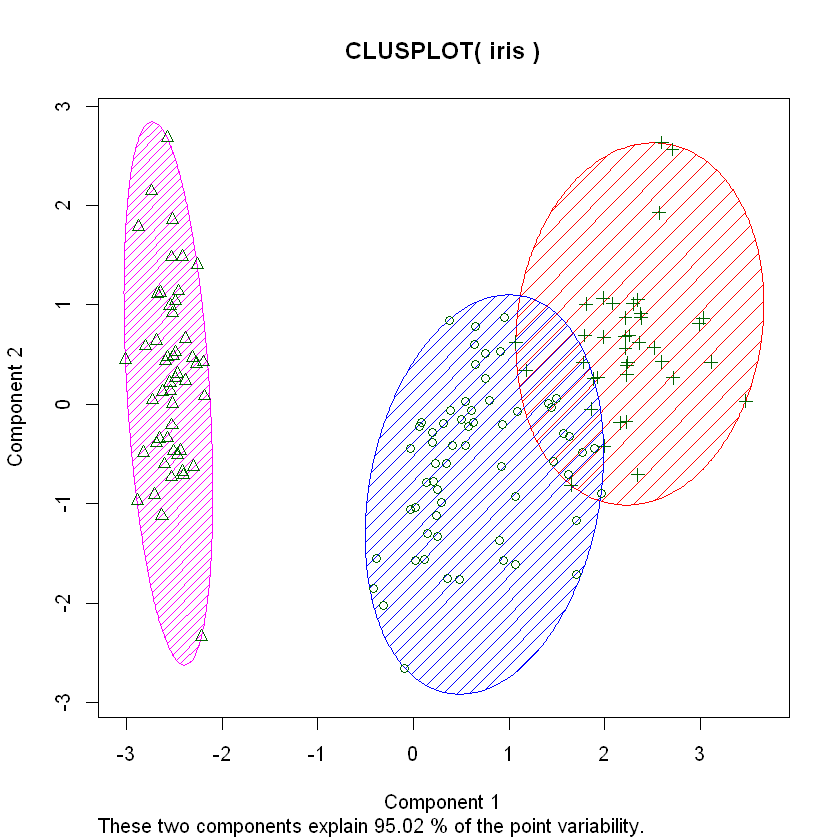

In [38]:
clusplot(iris, irisCluster$cluster, color = TRUE, shade = TRUE, labels = 0, lines = 0 )